# Using seaborn and pandas together in EDA

In [56]:
#first import the necessary libraries for this model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#Read the dataset:A Deathrow dataset which attracts alot of emotion while going through the last statement of each inmate before they were executed.
#Is a privilage to have such data from kaggle and experiment with it. 
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Datasets\tx_deathrow_full.csv")

In [58]:
data.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


In [59]:
#We want to drop some of unnecessary columns.
myData = data.drop(['Execution','Date of Birth','Date of Offence','First Name','TDCJ\nNumber','Date Received','Last Statement'], axis=True)

In [60]:
myData.tail()

,Highest Education Level,Last Name,Age at Execution,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State
548,NaN,Skillern,49,1985-01-16,White,Lubbock,NaN,NaN,NaN,NaN,NaN
549,NaN,Barefoot,39,1984-10-30,White,Bell,NaN,NaN,NaN,NaN,NaN
550,NaN,O'Bryan,39,1984-03-31,White,Harris,NaN,NaN,NaN,NaN,NaN
551,6.0,Autry,29,1984-03-14,White,Jefferson,Brown,137.0,"5' 8""",Potter,Texas
552,12.0,"Brooks, Jr.",40,1982-12-07,Black,Tarrant,Maroon,150.0,"5' 9""",Tarrant,Texas


In [61]:
#check on how many null values we have in each column.
myData.isnull().sum()

Highest Education Level    48
Last Name                   0
Age at Execution            0
Execution Date              0
Race                        0
County                      0
Eye Color                  35
Weight                     42
Height                     40
Native County              43
Native State               29
dtype: int64

In [70]:
#Dealing with null values in columns with numerical values.
#We replace then with the mean value of that column using 'mean() method'
df=myData.fillna(myData.iloc[:,[0,7]].mean())

In [71]:
df.tail()

,Highest Education Level,Last Name,Age at Execution,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State
548,10.208911,Skillern,49,1985-01-16,White,Lubbock,NaN,175.982387,NaN,NaN,NaN
549,10.208911,Barefoot,39,1984-10-30,White,Bell,NaN,175.982387,NaN,NaN,NaN
550,10.208911,O'Bryan,39,1984-03-31,White,Harris,NaN,175.982387,NaN,NaN,NaN
551,6.000000,Autry,29,1984-03-14,White,Jefferson,Brown,137.000000,"5' 8""",Potter,Texas
552,12.000000,"Brooks, Jr.",40,1982-12-07,Black,Tarrant,Maroon,150.000000,"5' 9""",Tarrant,Texas


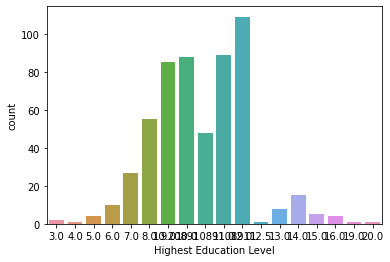

In [72]:
sns.countplot(x='Highest Education Level', data=df)
plt.show()

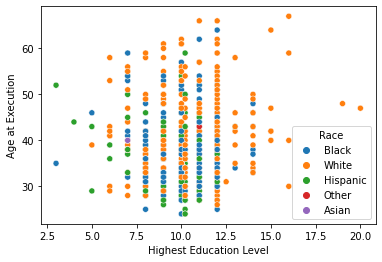

In [73]:
#Age at execution in relation to Education acquired
sns.scatterplot(x='Highest Education Level',y='Age at Execution', data=df, hue='Race')
plt.show()

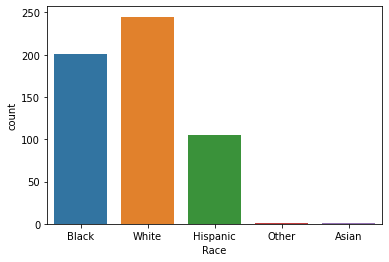

In [75]:
#which Race had more inmates
sns.countplot(x='Race', data=df)
plt.show()

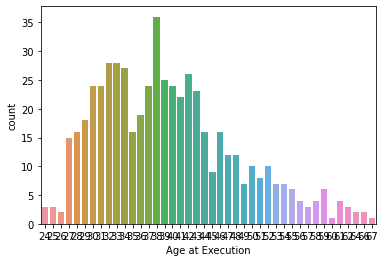

In [76]:
sns.countplot(x='Age at Execution', data=df)
plt.show()

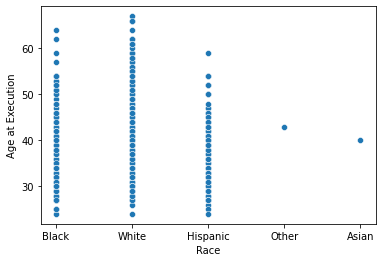

In [77]:
#which race had the youngest inmates
sns.scatterplot(x='Race',y='Age at Execution', data=df)
plt.show()

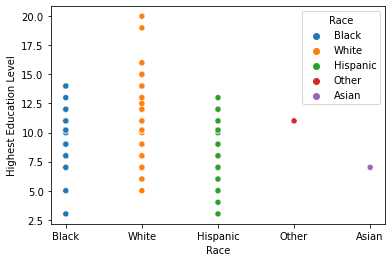

In [79]:
sns.scatterplot(x='Race',y='Highest Education Level', data=df, hue='Race')
plt.show()

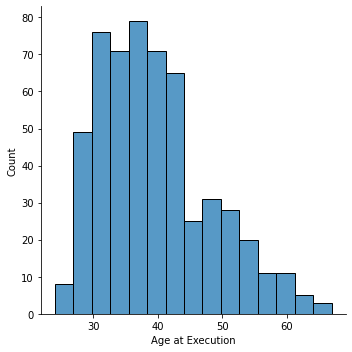

In [87]:
#Age distribution 
sns.displot(df['Age at Execution'],bins=15)

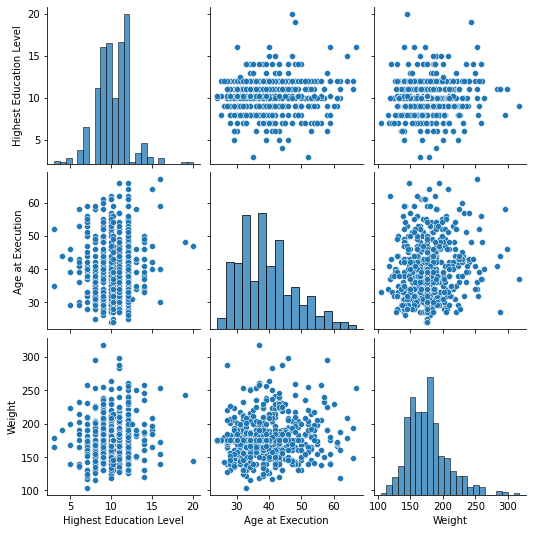

In [88]:
sns.pairplot(df)